# Iris dataset classification

In [50]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
# load data
df = pd.read_csv('datasets/iris.data')
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [52]:
# display stats about data
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [54]:
# preprocessing the dataset
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

We do not have any null values, that is good.

<Axes: >

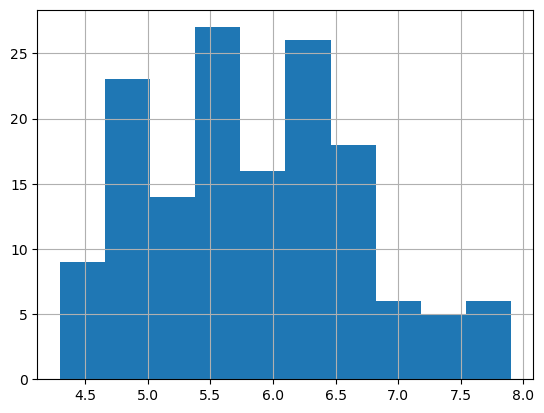

In [6]:
#Data analysis part

df['sepallength'].hist()

<Axes: >

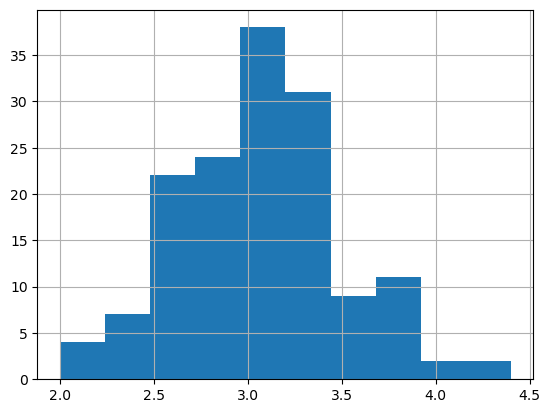

In [7]:
df['sepalwidth'].hist()

<Axes: >

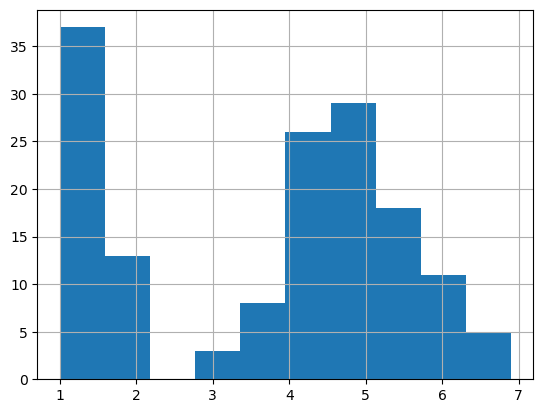

In [8]:
df['petallength'].hist()

<Axes: >

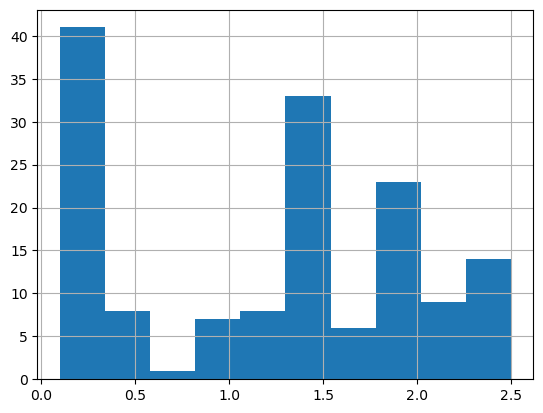

In [9]:
df['petalwidth'].hist()

Text(0, 0.5, 'Sepal width')

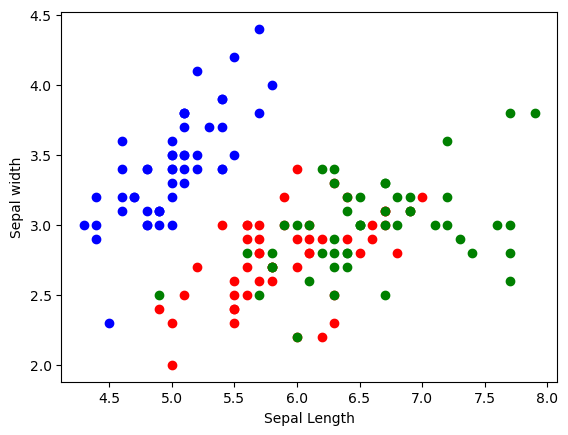

In [10]:
# plot the samples in a two dimensional plot
colors = ['red', 'blue', 'green']
spec = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

for i in range(3):
    comp = df[df['class'] == spec[i]]
    plt.scatter(comp['sepallength'], comp['sepalwidth'], c = colors[i], label=spec[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

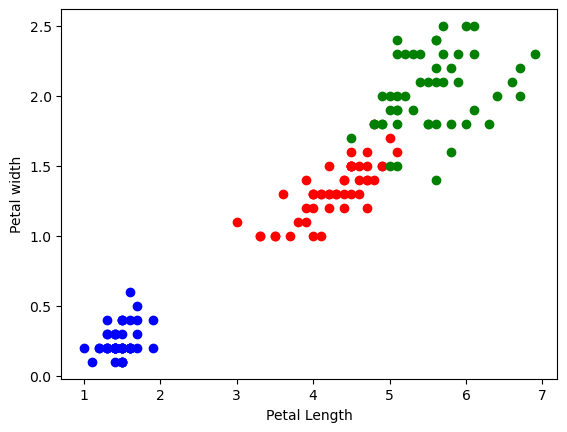

In [11]:
for i in range(3):
    comp = df[df['class'] == spec[i]]
    plt.scatter(comp['petallength'], comp['petalwidth'], c = colors[i], label=spec[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal width')

In [12]:
# correlation between features
df.corr()

C:\Users\Diyar\AppData\Local\Temp\ipykernel_17976\1881212359.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


The more the correlations are close to 0 or 1 the more they have a connection between each other

we have our target as categorical data so we need to convert those to numeric using label encoder


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


split data into train and test set

In [45]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

I will not use any scaler because data is not distributed badly

It is time to create a model, I won't create it with a single algorithm instead I will a few different classifier and look at the confusion matrix and accuracy score

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [47]:
# Logistic regression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# look at how it performed
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))


Accuracy:  100.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [48]:
# RandomForest
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy: ' , accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))

Accuracy:  100.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [49]:
# SVC
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy: ' , accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))

Accuracy:  100.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
